In [22]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [23]:
database_file = '/Users/israeldellinger/chicago-crime-property-analysis/Israel/data/chicago-crime-property.db'
connection = sqlite3.connect(database_file)
cursor = connection.cursor()

table_1_query = "SELECT * FROM Crime"
table_2_query = "SELECT * FROM Property"

In [24]:
crime_df = pd.read_sql_query(table_1_query, connection)
house_df = pd.read_sql_query(table_2_query, connection)

connection.close()

In [25]:
crime_df.head()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2023-12-31 23:59:00,"{'latitude': '41.900698378', 'human_address': ...",18,010XX N ORLEANS ST,1907173.0,41.900698,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8.0,...,27,JH103488,2023,0,14,-87.637330,1823,CRIMINAL DAMAGE,0,13327763
1,2023-12-31 23:51:00,"{'latitude': '41.754966726', 'human_address': ...",6,009XX E 77TH ST,1854148.0,41.754967,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,2024-01-08T15:59:56.000,69.0,...,8,JH100010,2023,1,04A,-87.602411,624,ASSAULT,0,13324997
2,2023-12-31 23:51:00,"{'latitude': '41.801583507', 'human_address': ...",9,051XX S PRINCETON AVE,1871065.0,41.801584,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,2024-01-08T15:59:56.000,37.0,...,20,JH100002,2023,0,04A,-87.633177,935,ASSAULT,0,13325009
3,2023-12-31 23:50:00,"{'latitude': '41.906519104', 'human_address': ...",25,014XX N LOCKWOOD AVE,1909050.0,41.906519,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,2024-01-08T15:59:56.000,25.0,...,37,JG561343,2023,0,08B,-87.758360,2532,BATTERY,0,13324829
4,2023-12-31 23:50:00,"{'latitude': '41.800200965', 'human_address': ...",9,051XX S WASHTENAW AVE,1870437.0,41.800201,DOMESTIC BATTERY SIMPLE,RESIDENCE,2024-01-08T15:59:56.000,63.0,...,14,JH100006,2023,1,08B,-87.691535,923,BATTERY,0,13324881


In [26]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530216 entries, 0 to 2530215
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location              object 
 2   district              int64  
 3   block                 object 
 4   y_coordinate          float64
 5   latitude              float64
 6   description           object 
 7   location_description  object 
 8   updated_on            object 
 9   community_area        float64
 10  iucr                  object 
 11  x_coordinate          float64
 12  ward                  int64  
 13  case_number           object 
 14  year                  int64  
 15  domestic              int64  
 16  fbi_code              object 
 17  longitude             float64
 18  beat                  int64  
 19  primary_type          object 
 20  arrest                int64  
 21  id                    int64  
dtypes: float64(5), int64(7), object(10)
memory

In [30]:
house_df.head()


,property_url,mls_id,style,street,zip_code,beds,full_baths,half_baths,sqft,year_built,...,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,neighborhood
0,https://www.realtor.com/realestateandhomes-det...,08326275,SINGLE_FAMILY,8548 S Bishop St,60620.0,3,1,-1,1350,1890,...,AUBURN GRESHAM,0,105065353.602,0,71,71,0,0,46757.7217161,AUBURN GRESHAM
1,https://www.realtor.com/realestateandhomes-det...,None,SINGLE_FAMILY,7716 S Aberdeen St,60620.0,3,1,-1,1300,1916,...,AUBURN GRESHAM,0,105065353.602,0,71,71,0,0,46757.7217161,AUBURN GRESHAM
2,https://www.realtor.com/realestateandhomes-det...,08401495,SINGLE_FAMILY,7837 S Wolcott Ave,60620.0,3,1,1,692,1951,...,AUBURN GRESHAM,0,105065353.602,0,71,71,0,0,46757.7217161,AUBURN GRESHAM
3,https://www.realtor.com/realestateandhomes-det...,08530200,MULTI_FAMILY,7807 S Sangamon St,60620.0,7,2,-1,-1,-1,...,AUBURN GRESHAM,0,105065353.602,0,71,71,0,0,46757.7217161,AUBURN GRESHAM
4,https://www.realtor.com/realestateandhomes-det...,08461738,SINGLE_FAMILY,7541 S Aberdeen St,60620.0,2,1,1,1437,1922,...,AUBURN GRESHAM,0,105065353.602,0,71,71,0,0,46757.7217161,AUBURN GRESHAM


In [31]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313419 entries, 0 to 313418
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   property_url    313419 non-null  object 
 1   mls_id          165697 non-null  object 
 2   style           312967 non-null  object 
 3   street          313381 non-null  object 
 4   zip_code        313418 non-null  float64
 5   beds            313419 non-null  int64  
 6   full_baths      313419 non-null  int64  
 7   half_baths      313419 non-null  int64  
 8   sqft            313419 non-null  int64  
 9   year_built      313419 non-null  int64  
 10  days_on_mls     313419 non-null  int64  
 11  list_price      313419 non-null  int64  
 12  list_date       165697 non-null  object 
 13  sold_price      313419 non-null  float64
 14  last_sold_date  313419 non-null  object 
 15  lot_sqft        145360 non-null  float64
 16  price_per_sqft  313419 non-null  float64
 17  latitude  

# Exploring Missing Values


In [34]:
house_missing_percentage = (house_df.isnull().sum() / len(house_df)) * 100
print(house_missing_percentage)

property_url       0.000000
mls_id            47.132433
style              0.144216
street             0.012124
zip_code           0.000319
beds               0.000000
full_baths         0.000000
half_baths         0.000000
sqft               0.000000
year_built         0.000000
days_on_mls        0.000000
list_price         0.000000
list_date         47.132433
sold_price         0.000000
last_sold_date     0.000000
lot_sqft          53.621191
price_per_sqft     0.000000
latitude           0.000000
longitude          0.000000
stories            0.000000
hoa_fee            0.000000
parking_garage    45.333563
index_right        0.000000
community          0.000000
area               0.000000
shape_area         0.000000
perimeter          0.000000
area_num_1         0.000000
area_numbe         0.000000
comarea_id         0.000000
comarea            0.000000
shape_len          0.000000
neighborhood       0.000000
dtype: float64


In [35]:
house_na_percentage = (house_df.isna().sum() / len(house_df)) * 100
print(house_missing_percentage)

property_url       0.000000
mls_id            47.132433
style              0.144216
street             0.012124
zip_code           0.000319
beds               0.000000
full_baths         0.000000
half_baths         0.000000
sqft               0.000000
year_built         0.000000
days_on_mls        0.000000
list_price         0.000000
list_date         47.132433
sold_price         0.000000
last_sold_date     0.000000
lot_sqft          53.621191
price_per_sqft     0.000000
latitude           0.000000
longitude          0.000000
stories            0.000000
hoa_fee            0.000000
parking_garage    45.333563
index_right        0.000000
community          0.000000
area               0.000000
shape_area         0.000000
perimeter          0.000000
area_num_1         0.000000
area_numbe         0.000000
comarea_id         0.000000
comarea            0.000000
shape_len          0.000000
neighborhood       0.000000
dtype: float64


In [13]:
crime_missing_percentage = (crime_df.isnull().sum() / len(crime_df)) * 100
print(crime_missing_percentage)

date                    0.000000
location                1.506077
district                0.000000
block                   0.000000
y_coordinate            0.000000
latitude                0.000000
description             0.000000
location_description    0.432611
updated_on              0.000000
community_area          0.000079
iucr                    0.000000
x_coordinate            0.000000
ward                    0.000000
case_number             0.000000
year                    0.000000
domestic                0.000000
fbi_code                0.000000
longitude               0.000000
beat                    0.000000
primary_type            0.000000
arrest                  0.000000
id                      0.000000
dtype: float64


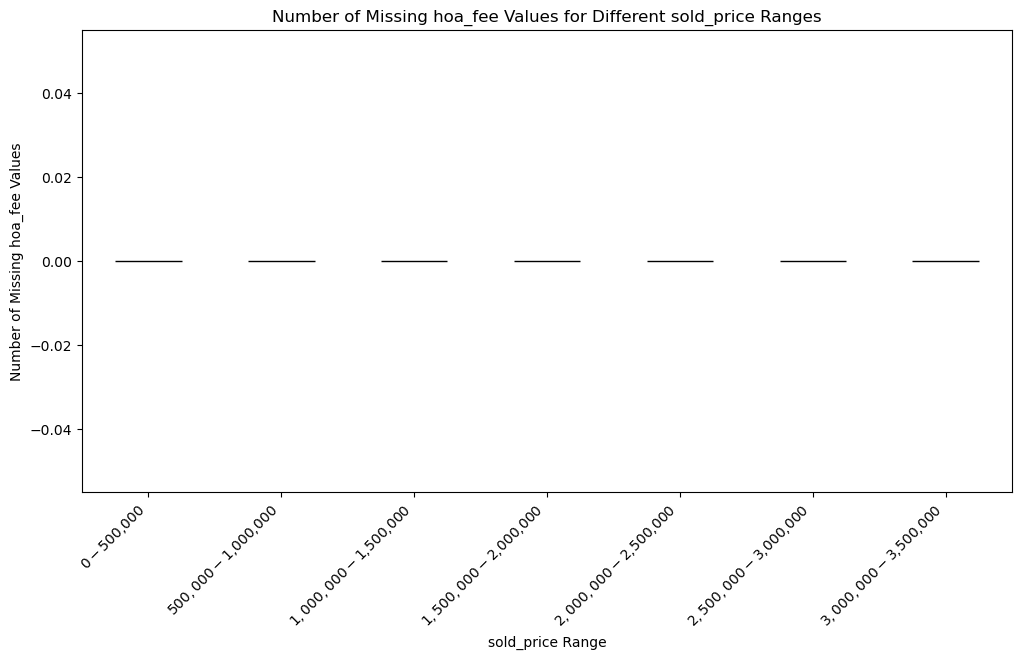

In [9]:
# Set the bins for 'sold_price'
bins = np.arange(0, 4000000, 500000)

# Create a new column in house_df to represent the bins
house_df['sold_price_bins'] = pd.cut(house_df['sold_price'], bins=bins, include_lowest=True)

# Count the number of missing values for each bin
missing_values_counts = house_df[house_df['hoa_fee'].isnull()].groupby('sold_price_bins').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_values_counts.plot(kind='bar', color='red', edgecolor='black')

# Set x-axis ticks with readable price ranges
bin_labels = ['${:,.0f} - ${:,.0f}'.format(left, right) for left, right in zip(bins[:-1], bins[1:])]
plt.xticks(range(len(bins)-1), bin_labels, rotation=45, ha='right')

# Set plot labels and title
plt.xlabel('sold_price Range')
plt.ylabel('Number of Missing hoa_fee Values')
plt.title('Number of Missing hoa_fee Values for Different sold_price Ranges')

# Show the plot
plt.show()


Missing HOA Values are closely related to price. Lower property value Real Estate is less likely to have HOAs in general so this data doesn't contribute meaningfuly and can be safely dropped.

In [14]:
house_df['unit'].info()
house_df['unit'].head()
house_df['unit'].value_counts()

KeyError: 'unit'

We already have the feature 'style' which describes the property and includes classification for apartment. The specific apartment number isn't of great use to us at the moment and can be safely dropped.

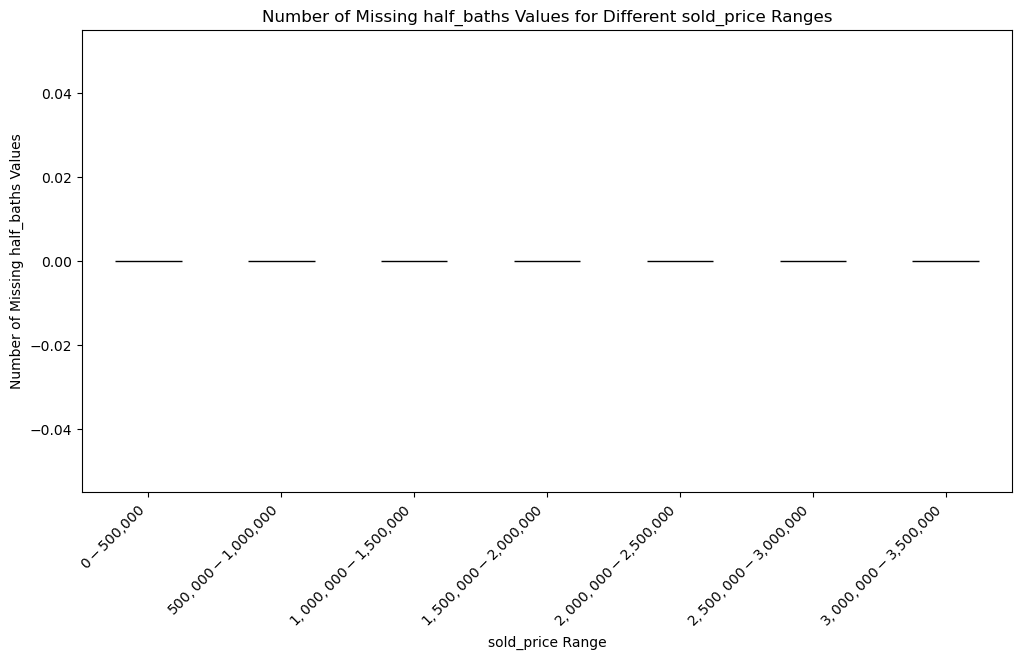

In [19]:
# Set the bins for 'sold_price'
bins = np.arange(0, 4000000, 500000)

# Create a new column in house_df to represent the bins
house_df['sold_price_bins'] = pd.cut(house_df['sold_price'], bins=bins, include_lowest=True)

# Count the number of missing values for each bin
missing_values_counts = house_df[house_df['half_baths'].isnull()].groupby('sold_price_bins').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_values_counts.plot(kind='bar', color='red', edgecolor='black')

# Set x-axis ticks with readable price ranges
bin_labels = ['${:,.0f} - ${:,.0f}'.format(left, right) for left, right in zip(bins[:-1], bins[1:])]
plt.xticks(range(len(bins)-1), bin_labels, rotation=45, ha='right')

# Set plot labels and title
plt.xlabel('sold_price Range')
plt.ylabel('Number of Missing half_baths Values')
plt.title('Number of Missing half_baths Values for Different sold_price Ranges')

# Show the plot
plt.show()

Similar to missing values for 'hoa_fees', 'half_baths' likely doesn't impact crime rates except as a bad substitute for property value and can safely be dropped. Likewise: 'full_baths', and 'beds' 

In [20]:
cleaned_house_df = house_df.drop(columns=['hoa_fee','unit','half_baths','full_baths', 'beds', 'mls', 'mls_id', 'stories','parking_garage','primary_photo','alt_photos'])
cleaned_house_df.info()

KeyError: "['unit', 'mls', 'primary_photo', 'alt_photos'] not found in axis"

In [29]:
missing_percentage = (cleaned_house_df.isnull().sum() / len(house_df)) * 100
print(missing_percentage)

property_url        0.000000
status              0.000000
style               0.013875
street              0.002313
city                0.000000
state               0.000000
zip_code            0.002313
sqft               35.534897
year_built         18.979233
days_on_mls        24.499329
list_price         19.853383
list_date          19.839508
sold_price          0.000000
last_sold_date      0.000000
lot_sqft           54.837889
price_per_sqft     35.611211
latitude            0.992091
longitude           0.992091
sold_price_bins     0.952777
dtype: float64


# Deeper dive into remaining missing values

In [21]:
style_counts = cleaned_house_df['style'].value_counts()

NameError: name 'cleaned_house_df' is not defined

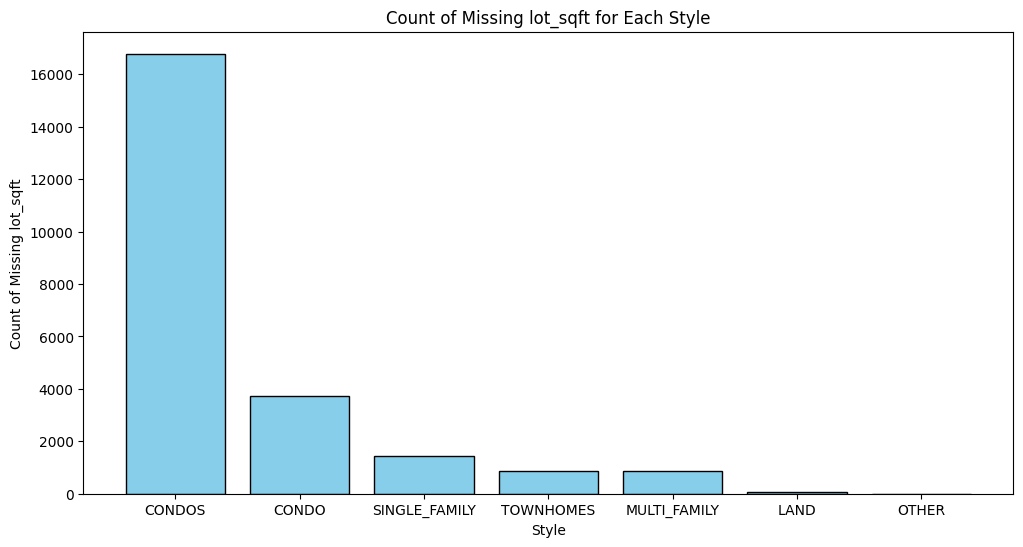

In [39]:
missing_lot_sqft = cleaned_house_df[cleaned_house_df['lot_sqft'].isnull()]

# Create a bar plot of missing 'lot_sqft' values for each 'style'
plt.figure(figsize=(12, 6))
plt.bar(missing_lot_sqft['style'].value_counts().index, missing_lot_sqft['style'].value_counts().values,
        color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Style')
plt.ylabel('Count of Missing lot_sqft')
plt.title('Count of Missing lot_sqft for Each Style')

# Show the plot
plt.show()